In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [1]:
# plt.figure(figsize=(8,5))
# sns.histplot(application['AMT_CREDIT'])
# plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
# plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
# <!--  plt.draw() -->
# <!--  axes.formatter.useoffset(False) -->

# this is what works
# plt.ticklabel_format(style='plain', axis='y')

In [43]:
pd.options.display.float_format = '{:,.3f}'.format

In [119]:
application['INCOME_BINS'] = pd.qcut(application['AMT_INCOME_TOTAL'],q=4,labels=['Low','Medium1','Medium2','High'])
application['INCOME_BINS'].value_counts()

Low        100578
Medium2     82213
High        71538
Medium1     53182
Name: INCOME_BINS, dtype: int64

In [142]:
a = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY']).count()[['SK_ID_CURR']]
a_default = (a/a_level1)*100
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_default = a_default.rename(columns={'SK_ID_CURR':'DEFAULT_RATES'}).reset_index()
income_drates = a.merge(a_default,on='INCOME_BINS')
income_drates = income_drates[income_drates['TARGET']==1]

In [143]:
income_drates

,INCOME_BINS,COUNT,FLAG_OWN_REALTY,TARGET,DEFAULT_RATES
1,Low,28342,N,1,9.041
3,Low,28342,Y,1,8.104
5,Low,2817,N,1,9.041
7,Low,2817,Y,1,8.104
9,Low,63793,N,1,9.041
11,Low,63793,Y,1,8.104
13,Low,5626,N,1,9.041
15,Low,5626,Y,1,8.104
17,Medium1,15068,N,1,8.878
19,Medium1,15068,Y,1,8.375


<AxesSubplot:xlabel='INCOME_BINS', ylabel='DEFAULT_RATES'>

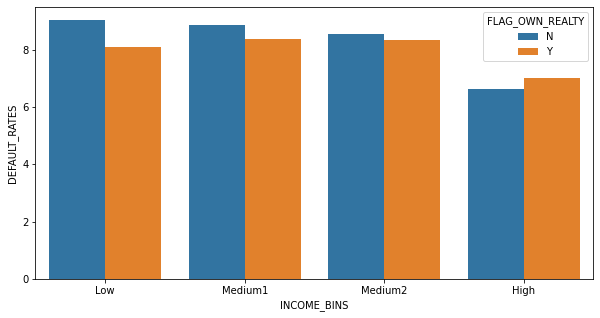

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='DEFAULT_RATES',hue='FLAG_OWN_REALTY',data=income_drates)

In [145]:
a = application.groupby(['INCOME_BINS','FLAG_OWN_CAR','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['INCOME_BINS','FLAG_OWN_CAR']).count()[['SK_ID_CURR']]
a_default = (a/a_level1)*100
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_default = a_default.rename(columns={'SK_ID_CURR':'DEFAULT_RATES'}).reset_index()
income_drates = a.merge(a_default,on='INCOME_BINS')
income_drates = income_drates[income_drates['TARGET']==1]

<AxesSubplot:xlabel='INCOME_BINS', ylabel='DEFAULT_RATES'>

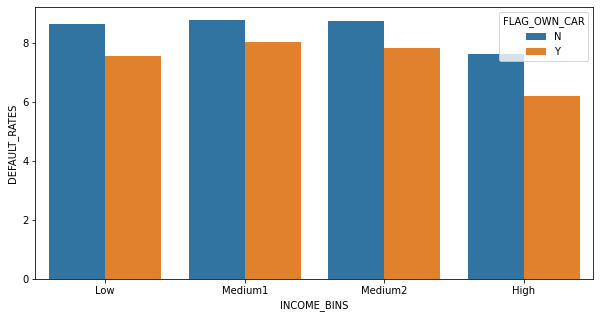

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='DEFAULT_RATES',hue='FLAG_OWN_CAR',data=income_drates)

In [5]:
application['SRC1_bins'] = pd.qcut(application['EXT_SOURCE_1'],q=3,labels=['LOW','MEDIUM','HIGH'])
application['SRC2_bins'] = pd.qcut(application['EXT_SOURCE_2'],q=3,labels=['LOW','MEDIUM','HIGH'])
application['SRC3_bins'] = pd.qcut(application['EXT_SOURCE_3'],q=3,labels=['LOW','MEDIUM','HIGH'])

In [11]:
a = application.groupby(['SRC1_bins','SRC2_bins','SRC3_bins','TARGET']).count()[['SK_ID_CURR']]
a = a.rename(columns={"SK_ID_CURR":"COUNT"})
a.reset_index(inplace=True)
select_sources = a.iloc[[1,27,53]]
select_sources.reset_index(inplace=True,drop=True)
a_level1 = application.groupby(['SRC1_bins','SRC2_bins','SRC3_bins']).count()[['SK_ID_CURR']]
a_level1.reset_index(inplace=True)
a_level1 = a_level1.iloc[[0,13,26]].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"})
a_level1.reset_index(inplace=True,drop=True)
a_level1['DEFAULTER_RATES'] = select_sources['COUNT']/a_level1['DEFAULTER_RATES']*100
source_drates =  select_sources.merge(a_level1)
source_drates

,SRC1_bins,SRC2_bins,SRC3_bins,TARGET,COUNT,DEFAULTER_RATES
0,LOW,LOW,LOW,1,1575,22.932440
1,MEDIUM,MEDIUM,MEDIUM,1,227,4.998899
2,HIGH,HIGH,HIGH,1,94,1.466001


In [14]:
a_level1

,SRC1_bins,SRC2_bins,SRC3_bins,DEFAULTER_RATES
0,LOW,LOW,LOW,22.932440
1,MEDIUM,MEDIUM,MEDIUM,4.998899
2,HIGH,HIGH,HIGH,1.466001


In [23]:
a = application.groupby(['SRC1_bins','SRC2_bins','SRC3_bins','TARGET']).count()[['SK_ID_CURR']]
a = a.rename(columns={"SK_ID_CURR":"COUNT"})
a_level1 = application.groupby(['SRC1_bins','SRC2_bins','SRC3_bins']).count()[['SK_ID_CURR']]
a_level1 = a_level1.rename(columns={'SK_ID_CURR':'COUNT'})
defaulter_rates = a/a_level1*100
defaulter_rates = defaulter_rates.rename(columns={'COUNT':'DEFAULTER_RATES'})
defaulter_rates = defaulter_rates.unstack().drop(col,axis=1)
defaulter_rates

COUNT
SRC1_bins SRC2_bins SRC3_bins TARGET       
LOW       LOW       LOW       0        5293
                              1        1575
                    MEDIUM    0        3755
                              1         553
                    HIGH      0        2479
                              1         251
          MEDIUM    LOW       0        4675
                              1         801
                    MEDIUM    0        3759
                              1         292
                    HIGH      0        2692
                              1         154
          HIGH      LOW       0        3033
                              1         427
                    MEDIUM    0        2860
                              1         171
                    HIGH      0        2372
                              1          94
MEDIUM    LOW       LOW       0        3585
                              1         657
                    MEDIUM    0        3322
                              1         250
                    HIGH      0        2774
                              1         139
          MEDIUM    LOW       0        4237
                              1         447
                    MEDIUM    0        4314
                              1         227
                    HIGH      0        3862
                              1         130
          HIGH      LOW       0        3856
                              1         276
                    MEDIUM    0        4415
                              1         132
                    HIGH      0        4083
                              1          88
HIGH      LOW       LOW       0        2346
                              1         284
                    MEDIUM    0        2694
                              1         127
                    HIGH      0        2736
                              1          99
          MEDIUM    LOW       0        3403
                              1         255
                    MEDIUM    0        4351
                              1         120
                    HIGH      0        4370
                              1          88
          HIGH      LOW       0        4241
                              1         156
                    MEDIUM    0        5766
                              1         111
                    HIGH      0        6318
                              1          94

COUNT
SRC1_bins SRC2_bins SRC3_bins       
LOW       LOW       LOW         6868
                    MEDIUM      4308
                    HIGH        2730
          MEDIUM    LOW         5476
                    MEDIUM      4051
                    HIGH        2846
          HIGH      LOW         3460
                    MEDIUM      3031
                    HIGH        2466
MEDIUM    LOW       LOW         4242
                    MEDIUM      3572
                    HIGH        2913
          MEDIUM    LOW         4684
                    MEDIUM      4541
                    HIGH        3992
          HIGH      LOW         4132
                    MEDIUM      4547
                    HIGH        4171
HIGH      LOW       LOW         2630
                    MEDIUM      2821
                    HIGH        2835
          MEDIUM    LOW         3658
                    MEDIUM      4471
                    HIGH        4458
          HIGH      LOW         4397
                    MEDIUM      5877
                    HIGH        6412

<AxesSubplot:xlabel='SRC1_bins,SRC2_bins'>

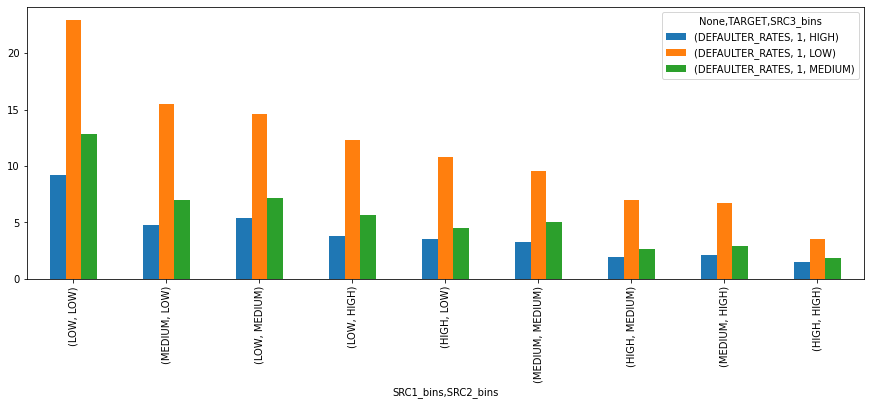

In [86]:
defaulter_rates.unstack().sort_values(('DEFAULTER_RATES', 1, 'LOW'),ascending=False).plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='SRC1_bins,SRC2_bins,SRC3_bins'>

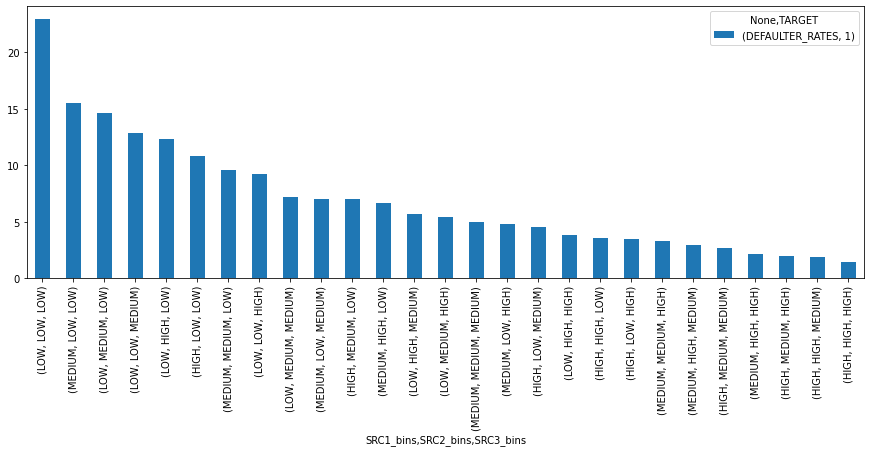

In [77]:
defaulter_rates.sort_values(('DEFAULTER_RATES', 1),ascending=False).plot(kind='bar',figsize=(15,5))

In [4]:
plt.figure(figsize=(10,5))
plt.hist(application[application['TARGET']==0]['SK_ID_CURR'],label=0,color='blue',alpha=0.5,bins=15)
plt.hist(application[application['TARGET']==1]['SK_ID_CURR'],label='defaulter',color='green',alpha=0.5,bins=15)
plt.legend()

##### Income with flag own realty

<AxesSubplot:xlabel='INCOME_BINS', ylabel='DEFAULT_RATES'>

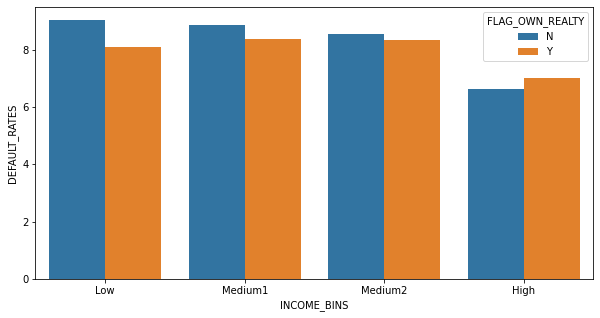

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='DEFAULT_RATES',hue='FLAG_OWN_REALTY',data=income_drates)

### Income with Flag own car

<AxesSubplot:xlabel='INCOME_BINS', ylabel='DEFAULT_RATES'>

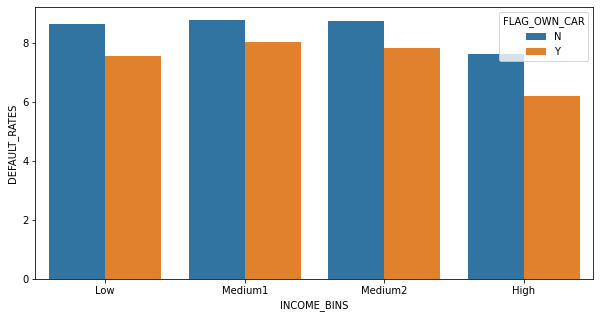

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='DEFAULT_RATES',hue='FLAG_OWN_CAR',data=income_drates)

### External Sources 1,2,3

<AxesSubplot:xlabel='SRC1_bins,SRC2_bins'>

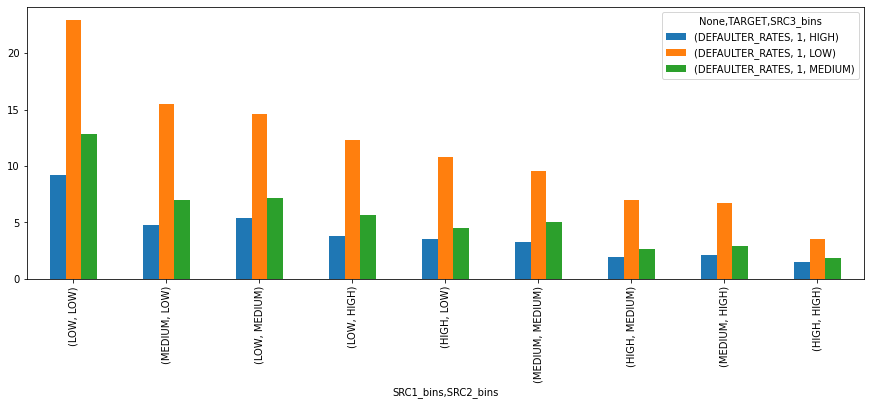

In [86]:
defaulter_rates.unstack().sort_values(('DEFAULTER_RATES', 1, 'LOW'),ascending=False).plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='SRC1_bins,SRC2_bins,SRC3_bins'>

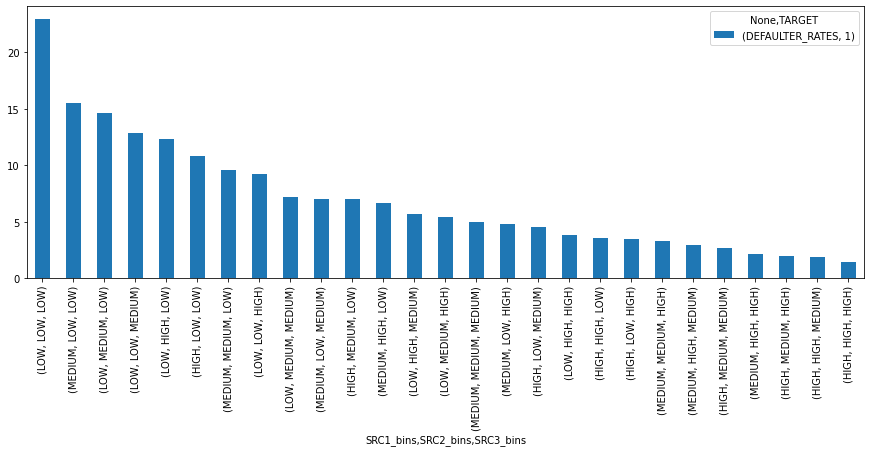

In [77]:
defaulter_rates.sort_values(('DEFAULTER_RATES', 1),ascending=False).plot(kind='bar',figsize=(15,5))